# **Tugas-5 K-Mean Clustering**

#Persiapan

* Impor train_test_split dari sklearn

* Impor KNeighborsClassifier dari sklearn

* Impor pandas library

In [1]:
import pandas as pd
import numpy as np
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [2]:
dataset_url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"

In [5]:
df = pd.read_csv(dataset_url)
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [6]:
#check number of rows and columns in dataset
df.shape

(150, 5)

#Menghitung Data

* Pisahkan feature “variety” dari dataframe

* Tentukan nilai K atau centroid

* Hitung jarak data terhadap centroid

* Hitung rata-rata data per-cluster

In [7]:
# delete 'variety' column
df_without_label = df.drop(columns=["variety"])
df_without_label

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
# separate target 

# values
X=df.iloc[:,0:4].values

# 
y = df.values[:,4]

In [9]:
le = preprocessing.LabelEncoder()
labels = le.fit_transform(y)

In [10]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
# data_tes = np.array(labels)
kmeans = KMeans(n_clusters=3, n_init=1, max_iter=1)
kmeans.fit(X)
# kmeans.labels_
labels = kmeans.predict(X)

centroids = kmeans.cluster_centers_

In [12]:
centroids

array([[5.00555556, 3.34444444, 1.5962963 , 0.3037037 ],
       [6.00327869, 2.78360656, 4.50819672, 1.45737705],
       [6.85714286, 3.09142857, 5.78571429, 2.13142857]])

In [13]:
df = pd.DataFrame(labels, columns=["Label"])

In [14]:
df

,Label
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,1
147,2
148,2


In [15]:
from sklearn.decomposition import PCA
pca = PCA()
# pca = PCA(n_components=2)
X_new = pca.fit_transform(X)

In [16]:
X_new

array([[-2.68412563e+00,  3.19397247e-01, -2.79148276e-02,
        -2.26243707e-03],
       [-2.71414169e+00, -1.77001225e-01, -2.10464272e-01,
        -9.90265503e-02],
       [-2.88899057e+00, -1.44949426e-01,  1.79002563e-02,
        -1.99683897e-02],
       [-2.74534286e+00, -3.18298979e-01,  3.15593736e-02,
         7.55758166e-02],
       [-2.72871654e+00,  3.26754513e-01,  9.00792406e-02,
         6.12585926e-02],
       [-2.28085963e+00,  7.41330449e-01,  1.68677658e-01,
         2.42008576e-02],
       [-2.82053775e+00, -8.94613845e-02,  2.57892158e-01,
         4.81431065e-02],
       [-2.62614497e+00,  1.63384960e-01, -2.18793179e-02,
         4.52978706e-02],
       [-2.88638273e+00, -5.78311754e-01,  2.07595703e-02,
         2.67447358e-02],
       [-2.67275580e+00, -1.13774246e-01, -1.97632725e-01,
         5.62954013e-02],
       [-2.50694709e+00,  6.45068899e-01, -7.53180094e-02,
         1.50199245e-02],
       [-2.61275523e+00,  1.47299392e-02,  1.02150260e-01,
      

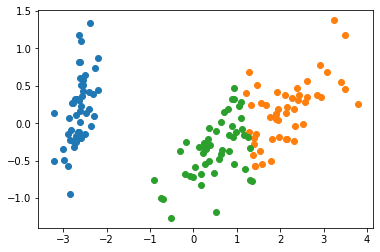

In [17]:
# retrieve unique clusters
clusters = unique(labels)
# fit the model
kmeans.fit(X)
# assign a cluster to each example
yhat = kmeans.predict(X)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X_new[row_ix, 0], X_new[row_ix, 1])
# show the plot
pyplot.show()